In [1]:
import os
import sys, traceback
import numpy as np
import struct
import PIL.Image
import matplotlib.pyplot as plt
import scipy.misc
import os.path
import binascii
from pprint import pprint

%matplotlib inline
#plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [22]:
# 读取图像和对应的汉字
def read_from_gnt_dir(gnt_dir):
    def one_file(f):
        header_size = 10
        while True:
            header = np.fromfile(f, dtype='uint8', count=header_size)
            if not header.size: break
            sample_size = header[0] + (header[1]<<8) + (header[2]<<16) + (header[3]<<24)
            tagcode = header[5] + (header[4]<<8)
            width = header[6] + (header[7]<<8)
            height = header[8] + (header[9]<<8)
            if header_size + width*height != sample_size:
                break
            image = np.fromfile(f, dtype='uint8', count=width*height).reshape((height, width))
            yield image, tagcode

    for file_name in os.listdir(gnt_dir):
        if file_name.endswith('.gnt'):
            file_path = os.path.join(gnt_dir, file_name)
            with open(file_path, 'rb') as f:
                for image, tagcode in one_file(f):
                    yield image, tagcode

def resize_and_normalize_image(img):
    # 补方
    pad_size = abs(img.shape[0]-img.shape[1]) // 2
    if img.shape[0] < img.shape[1]:
        pad_dims = ((pad_size, pad_size), (0, 0))
    else:
        pad_dims = ((0, 0), (pad_size, pad_size))
    img = np.lib.pad(img, pad_dims, mode='constant', constant_values=255)
    # 缩放
    img = scipy.misc.imresize(img, (64 - 4*2, 64 - 4*2))
    img = np.lib.pad(img, ((4, 4), (4, 4)), mode='constant', constant_values=255)
    #assert img.shape == (64, 64)
    
    img = scipy.misc.imresize(img, (32,32))
    assert img.shape == (32, 32)

#     img = img.flatten()
#     像素值范围-1到1
#     img = (img - 128) / 128？
    return img

def write_image_to_dir(file_dir, image, tagcode):
    file = None
    if os.path.isfile(file_dir) is False:
        file = open(file_dir, 'wb')
    else:
        file = open(file_dir, 'ab')
    image = image.flatten()
    file.write(np.int16(tagcode))
    file.write(image)
    file.close()

def show_image(image):
    im = PIL.Image.fromarray(image)
#   im.convert('RGB').save(tagcode_unicode.encode('ascii','ignore') + str(train_counter) + '.png')
    print(tagcode_unicode)
    plt.imshow(image)
#         plt.title('%s' % (tagcode_unicode))
    plt.axis('off')
    plt.show()

words = {}
category = 0
def words_summery(tag):
    global category, words
    word = words.get(tagcode)
    if word is not None:
        word['count']+=1
        c = word['category']
    else:
        words[tagcode] = {'count':1,'category':category}
        c = category
        category += 1
    return c

抒


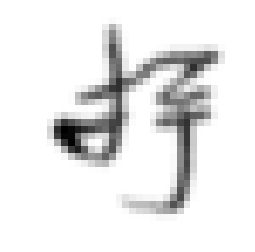

败


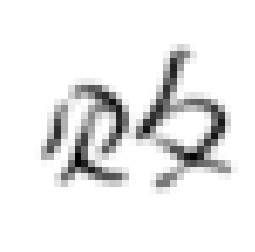

阀


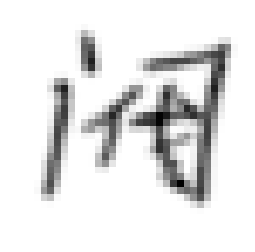

谁


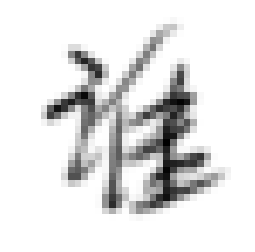

粉


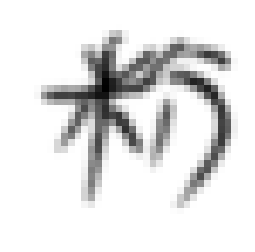

艺


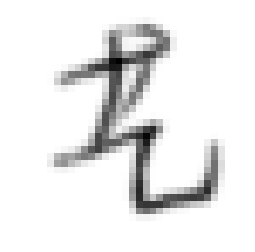

苯


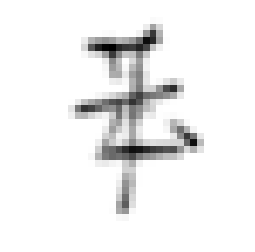

叛


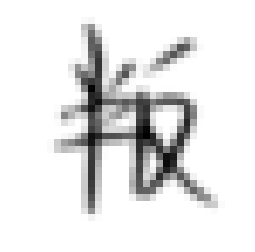

予


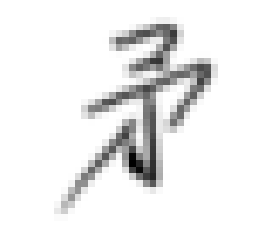

姑


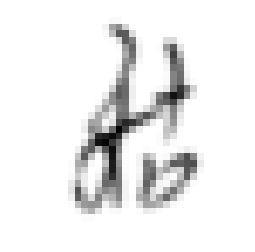

猖


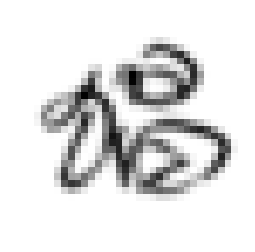

委


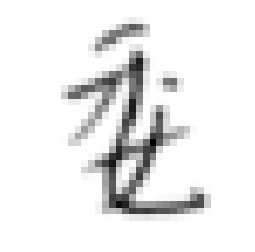

悍


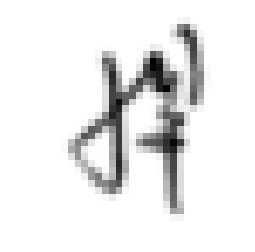

翅


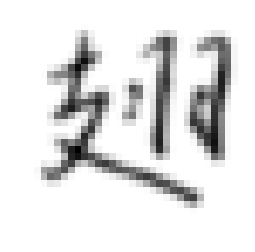

寥


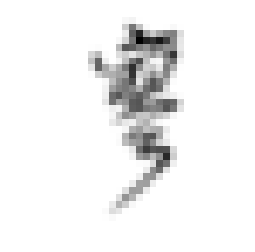

护


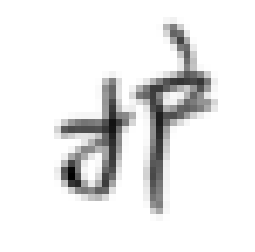

惜


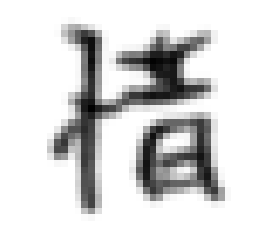

垄


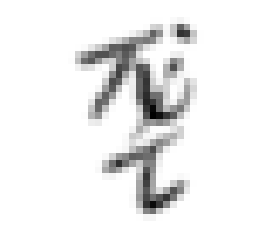

饥


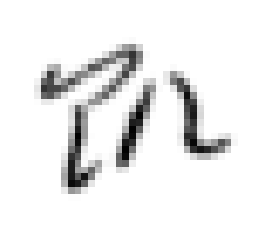

撰


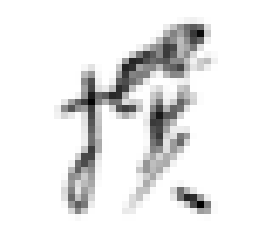

笺


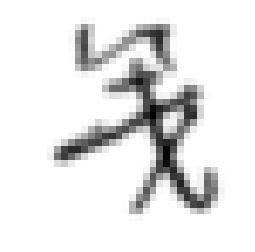

蓄


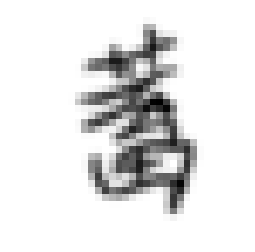

最


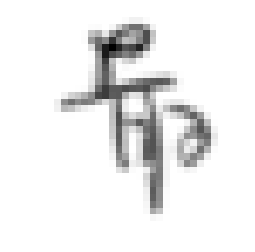

薯


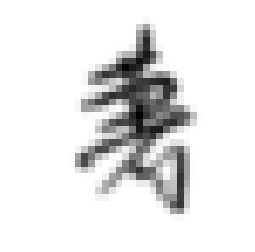

搬


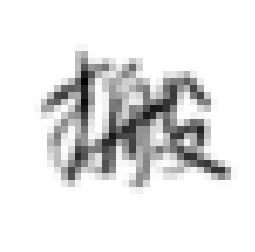

碎


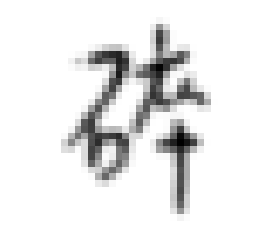

崩


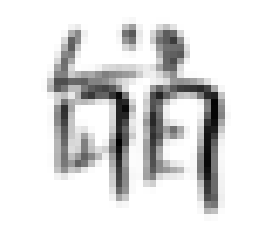

索


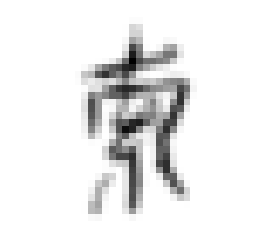

穗


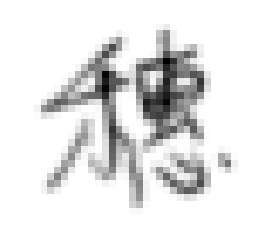

懦


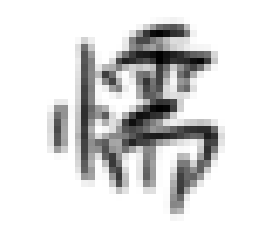

爵


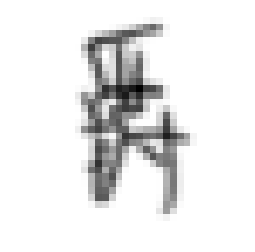

泳


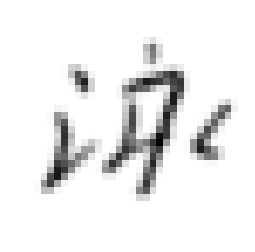

源


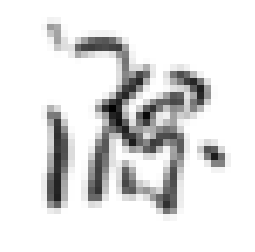

官


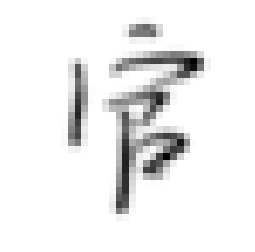

曾


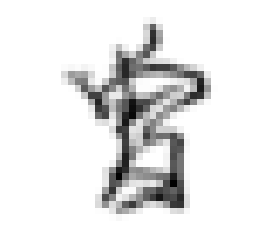

纯


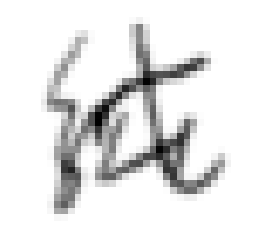

赁


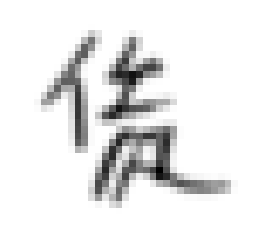

凌


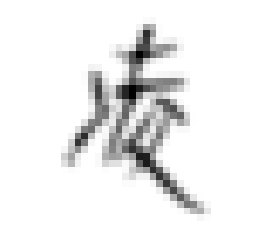

岭


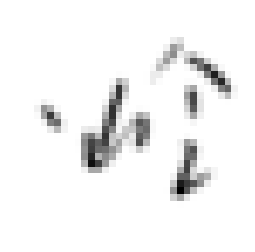

沦


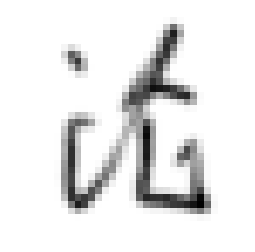

煽


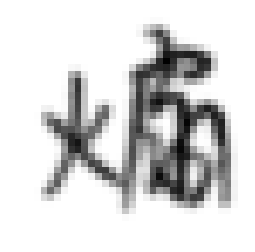

既


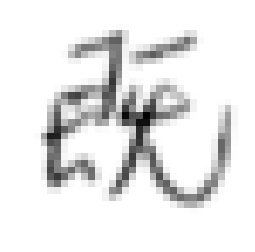

寐


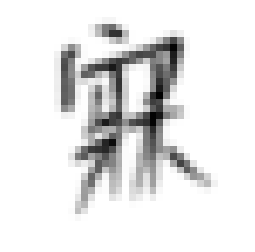

独


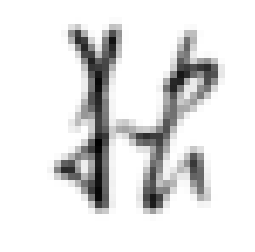

藩


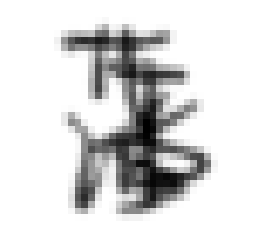

也


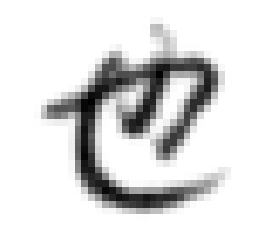

谣


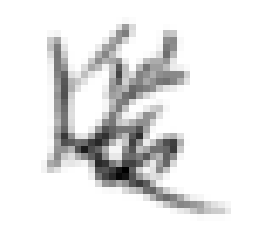

依


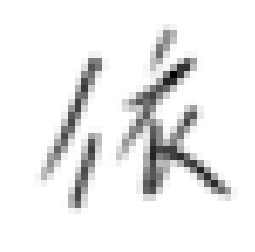

漂


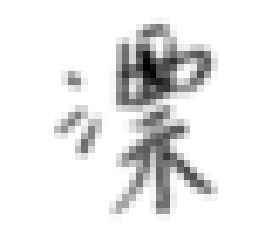

搏


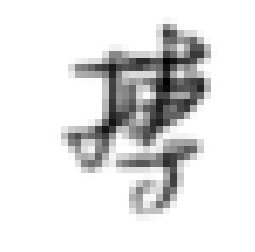

锑


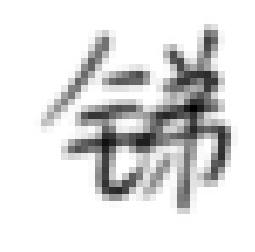

克


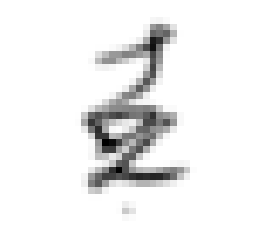

跨


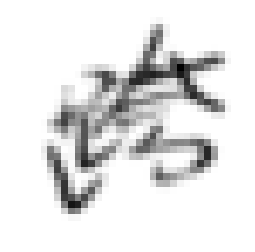

款


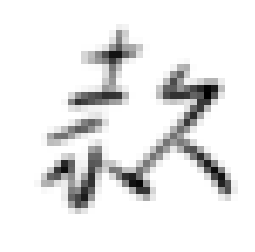

蹭


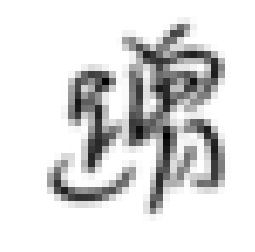

管


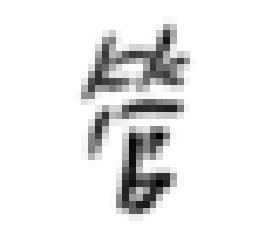

宛


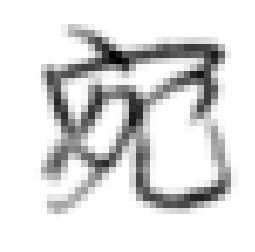

国


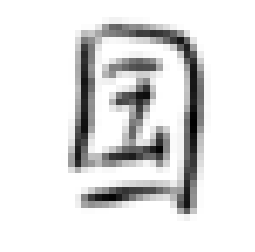

例


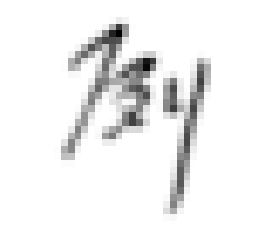

莲


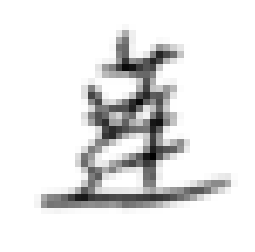

战


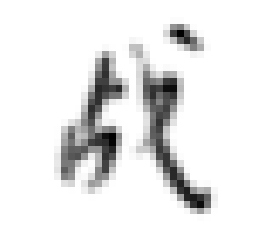

然


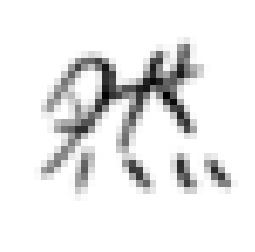

赐


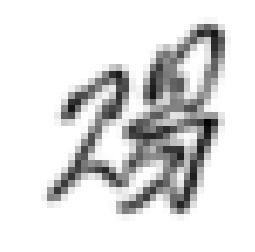

胡


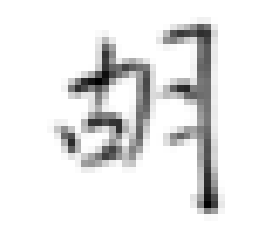

花


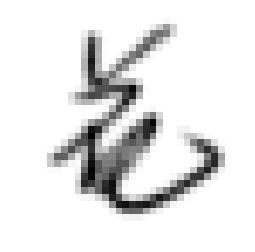

怀


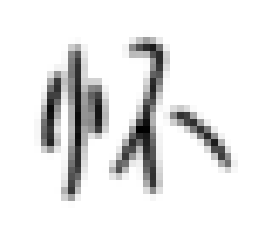

妊


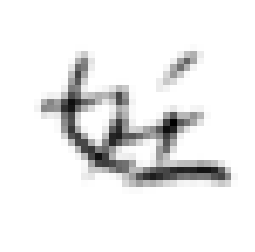

卢


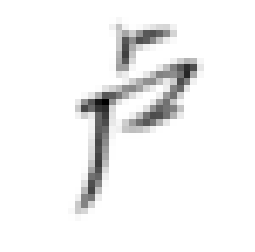

棘


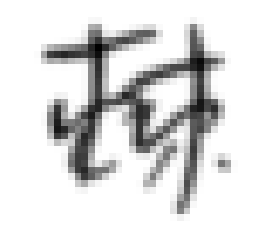

箩


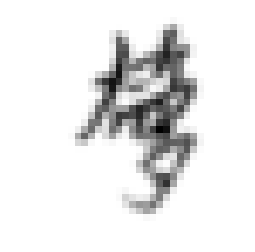

谩


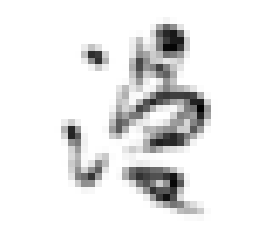

卯


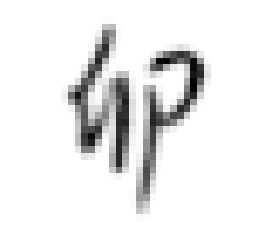

艾


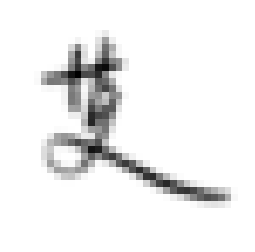

揭


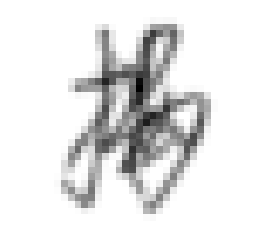

兢


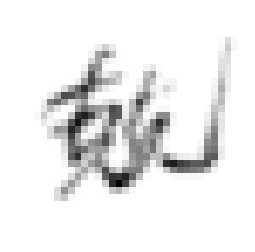

浸


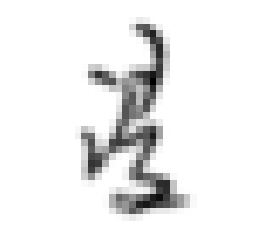

俗


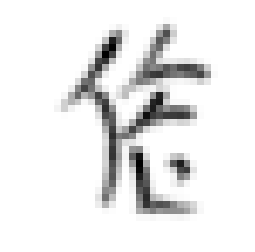

堡


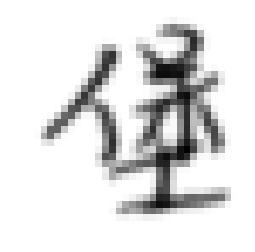

宜


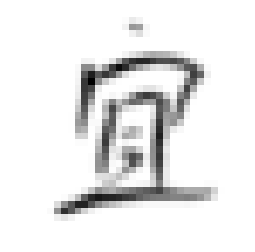

乙


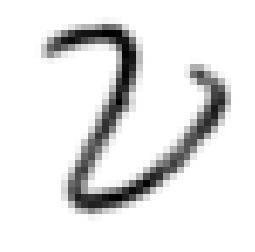

编


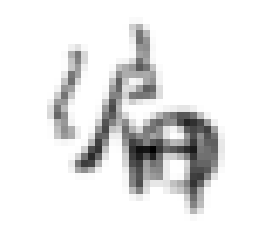

稿


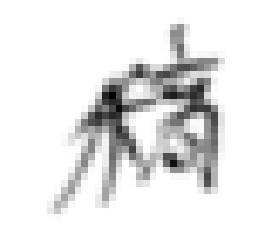

才


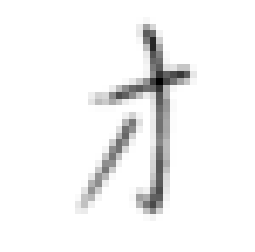

娱


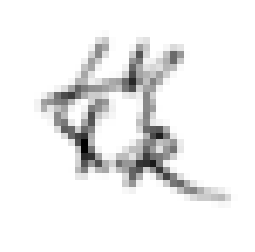

狱


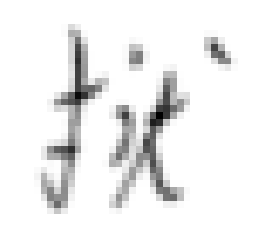

宛


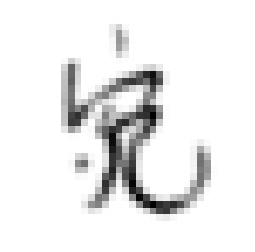

杭


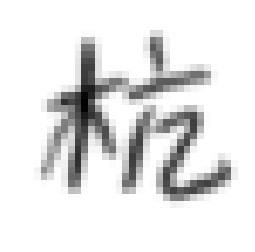

摘


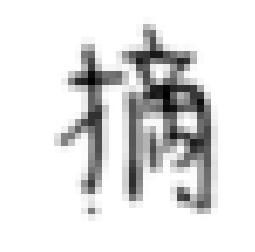

邱


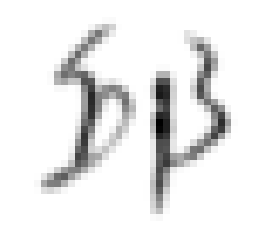

{45217: {'category': 1235, 'count': 240},
 45218: {'category': 1236, 'count': 240},
 45219: {'category': 1237, 'count': 240},
 45220: {'category': 1238, 'count': 240},
 45221: {'category': 1239, 'count': 239},
 45222: {'category': 1240, 'count': 239},
 45223: {'category': 1241, 'count': 240},
 45224: {'category': 1242, 'count': 240},
 45225: {'category': 1243, 'count': 239},
 45226: {'category': 1244, 'count': 239},
 45227: {'category': 1245, 'count': 239},
 45228: {'category': 1246, 'count': 240},
 45229: {'category': 1247, 'count': 237},
 45230: {'category': 1248, 'count': 240},
 45231: {'category': 1249, 'count': 238},
 45232: {'category': 1250, 'count': 239},
 45233: {'category': 1251, 'count': 238},
 45234: {'category': 1252, 'count': 239},
 45235: {'category': 1253, 'count': 240},
 45236: {'category': 1254, 'count': 240},
 45237: {'category': 1255, 'count': 240},
 45238: {'category': 1256, 'count': 240},
 45239: {'category': 1257, 'count': 240},
 45240: {'category': 1258, 'count'

 45746: {'category': 1440, 'count': 239},
 45747: {'category': 1441, 'count': 239},
 45748: {'category': 1442, 'count': 239},
 45749: {'category': 1443, 'count': 239},
 45750: {'category': 1444, 'count': 237},
 45751: {'category': 1445, 'count': 240},
 45752: {'category': 1446, 'count': 240},
 45753: {'category': 1447, 'count': 240},
 45754: {'category': 1448, 'count': 237},
 45755: {'category': 1449, 'count': 239},
 45756: {'category': 1450, 'count': 240},
 45757: {'category': 1451, 'count': 240},
 45758: {'category': 1452, 'count': 237},
 45759: {'category': 1453, 'count': 240},
 45760: {'category': 1454, 'count': 239},
 45761: {'category': 1455, 'count': 238},
 45762: {'category': 1456, 'count': 236},
 45763: {'category': 1457, 'count': 240},
 45764: {'category': 1458, 'count': 238},
 45765: {'category': 1459, 'count': 240},
 45766: {'category': 1460, 'count': 240},
 45767: {'category': 1461, 'count': 239},
 45768: {'category': 1462, 'count': 240},
 45769: {'category': 1463, 'count'

 46497: {'category': 1705, 'count': 238},
 46498: {'category': 1706, 'count': 239},
 46499: {'category': 1707, 'count': 239},
 46500: {'category': 1708, 'count': 237},
 46501: {'category': 1709, 'count': 239},
 46502: {'category': 1710, 'count': 240},
 46503: {'category': 1711, 'count': 240},
 46504: {'category': 1712, 'count': 240},
 46505: {'category': 1713, 'count': 240},
 46506: {'category': 1714, 'count': 240},
 46507: {'category': 1715, 'count': 240},
 46508: {'category': 1716, 'count': 240},
 46509: {'category': 1717, 'count': 240},
 46510: {'category': 1718, 'count': 240},
 46511: {'category': 1719, 'count': 238},
 46512: {'category': 1720, 'count': 240},
 46513: {'category': 1721, 'count': 240},
 46514: {'category': 1722, 'count': 239},
 46515: {'category': 1723, 'count': 240},
 46516: {'category': 1724, 'count': 240},
 46517: {'category': 1725, 'count': 240},
 46518: {'category': 1726, 'count': 238},
 46519: {'category': 1727, 'count': 240},
 46520: {'category': 1728, 'count'

 47541: {'category': 2100, 'count': 240},
 47542: {'category': 2101, 'count': 240},
 47543: {'category': 2102, 'count': 240},
 47544: {'category': 2103, 'count': 240},
 47545: {'category': 2104, 'count': 238},
 47546: {'category': 2105, 'count': 240},
 47547: {'category': 2106, 'count': 240},
 47548: {'category': 2107, 'count': 232},
 47549: {'category': 2108, 'count': 239},
 47550: {'category': 2109, 'count': 240},
 47551: {'category': 2110, 'count': 238},
 47552: {'category': 2111, 'count': 240},
 47553: {'category': 2112, 'count': 239},
 47554: {'category': 2113, 'count': 240},
 47555: {'category': 2114, 'count': 239},
 47556: {'category': 2115, 'count': 238},
 47557: {'category': 2116, 'count': 239},
 47558: {'category': 2117, 'count': 238},
 47559: {'category': 2118, 'count': 240},
 47560: {'category': 2119, 'count': 239},
 47561: {'category': 2120, 'count': 237},
 47562: {'category': 2121, 'count': 239},
 47563: {'category': 2122, 'count': 240},
 47564: {'category': 2123, 'count'

 48632: {'category': 2541, 'count': 239},
 48633: {'category': 2542, 'count': 239},
 48634: {'category': 2543, 'count': 240},
 48635: {'category': 2544, 'count': 240},
 48636: {'category': 2545, 'count': 238},
 48637: {'category': 2546, 'count': 239},
 48638: {'category': 2547, 'count': 239},
 48801: {'category': 2548, 'count': 240},
 48802: {'category': 2549, 'count': 240},
 48803: {'category': 2550, 'count': 239},
 48804: {'category': 2551, 'count': 239},
 48805: {'category': 2552, 'count': 240},
 48806: {'category': 2553, 'count': 239},
 48807: {'category': 2554, 'count': 240},
 48808: {'category': 2555, 'count': 240},
 48809: {'category': 2556, 'count': 240},
 48810: {'category': 2557, 'count': 240},
 48811: {'category': 2558, 'count': 239},
 48812: {'category': 2559, 'count': 240},
 48813: {'category': 2560, 'count': 240},
 48814: {'category': 2561, 'count': 239},
 48815: {'category': 2562, 'count': 238},
 48816: {'category': 2563, 'count': 237},
 48817: {'category': 2564, 'count'

 49911: {'category': 3010, 'count': 240},
 49912: {'category': 3011, 'count': 240},
 49913: {'category': 3012, 'count': 240},
 49914: {'category': 3013, 'count': 239},
 49915: {'category': 3014, 'count': 238},
 49916: {'category': 3015, 'count': 240},
 49917: {'category': 3016, 'count': 239},
 49918: {'category': 3017, 'count': 238},
 50081: {'category': 3018, 'count': 240},
 50082: {'category': 3019, 'count': 238},
 50083: {'category': 3020, 'count': 240},
 50084: {'category': 3021, 'count': 239},
 50085: {'category': 3022, 'count': 239},
 50086: {'category': 3023, 'count': 240},
 50087: {'category': 3024, 'count': 239},
 50088: {'category': 3025, 'count': 239},
 50089: {'category': 3026, 'count': 239},
 50090: {'category': 3027, 'count': 238},
 50091: {'category': 3028, 'count': 239},
 50092: {'category': 3029, 'count': 240},
 50093: {'category': 3030, 'count': 240},
 50094: {'category': 3031, 'count': 238},
 50095: {'category': 3032, 'count': 237},
 50096: {'category': 3033, 'count'

 51155: {'category': 3443, 'count': 240},
 51156: {'category': 3444, 'count': 240},
 51157: {'category': 3445, 'count': 238},
 51158: {'category': 3446, 'count': 240},
 51159: {'category': 3447, 'count': 239},
 51160: {'category': 3448, 'count': 240},
 51161: {'category': 3449, 'count': 239},
 51162: {'category': 3450, 'count': 240},
 51163: {'category': 3451, 'count': 240},
 51164: {'category': 3452, 'count': 239},
 51165: {'category': 3453, 'count': 239},
 51166: {'category': 3454, 'count': 239},
 51167: {'category': 3455, 'count': 235},
 51168: {'category': 3456, 'count': 240},
 51169: {'category': 3457, 'count': 239},
 51170: {'category': 3458, 'count': 240},
 51171: {'category': 3459, 'count': 240},
 51172: {'category': 3460, 'count': 240},
 51173: {'category': 3461, 'count': 240},
 51174: {'category': 3462, 'count': 240},
 51175: {'category': 3463, 'count': 239},
 51176: {'category': 3464, 'count': 239},
 51177: {'category': 3465, 'count': 238},
 51178: {'category': 3466, 'count'

 52212: {'category': 101, 'count': 239},
 52213: {'category': 102, 'count': 239},
 52214: {'category': 103, 'count': 240},
 52215: {'category': 104, 'count': 238},
 52216: {'category': 105, 'count': 237},
 52217: {'category': 106, 'count': 240},
 52218: {'category': 107, 'count': 240},
 52219: {'category': 108, 'count': 239},
 52220: {'category': 109, 'count': 240},
 52221: {'category': 110, 'count': 240},
 52222: {'category': 111, 'count': 238},
 52385: {'category': 112, 'count': 240},
 52386: {'category': 113, 'count': 240},
 52387: {'category': 114, 'count': 239},
 52388: {'category': 115, 'count': 239},
 52389: {'category': 116, 'count': 240},
 52390: {'category': 117, 'count': 240},
 52391: {'category': 118, 'count': 240},
 52392: {'category': 119, 'count': 240},
 52393: {'category': 120, 'count': 238},
 52394: {'category': 121, 'count': 239},
 52395: {'category': 122, 'count': 240},
 52396: {'category': 123, 'count': 240},
 52397: {'category': 124, 'count': 240},
 52398: {'catego

 53757: {'category': 674, 'count': 238},
 53758: {'category': 675, 'count': 239},
 53921: {'category': 676, 'count': 239},
 53922: {'category': 677, 'count': 239},
 53923: {'category': 678, 'count': 240},
 53924: {'category': 679, 'count': 238},
 53925: {'category': 680, 'count': 238},
 53926: {'category': 681, 'count': 240},
 53927: {'category': 682, 'count': 240},
 53928: {'category': 683, 'count': 240},
 53929: {'category': 684, 'count': 237},
 53930: {'category': 685, 'count': 240},
 53931: {'category': 686, 'count': 240},
 53932: {'category': 687, 'count': 240},
 53933: {'category': 688, 'count': 238},
 53934: {'category': 689, 'count': 239},
 53935: {'category': 690, 'count': 237},
 53936: {'category': 691, 'count': 238},
 53937: {'category': 692, 'count': 237},
 53938: {'category': 693, 'count': 240},
 53939: {'category': 694, 'count': 240},
 53940: {'category': 695, 'count': 238},
 53941: {'category': 696, 'count': 240},
 53942: {'category': 697, 'count': 239},
 53943: {'catego

 54947: {'category': 1054, 'count': 240},
 54948: {'category': 1055, 'count': 240},
 54949: {'category': 1056, 'count': 240},
 54950: {'category': 1057, 'count': 239},
 54951: {'category': 1058, 'count': 236},
 54952: {'category': 1059, 'count': 240},
 54953: {'category': 1060, 'count': 239},
 54954: {'category': 1061, 'count': 240},
 54955: {'category': 1062, 'count': 240},
 54956: {'category': 1063, 'count': 241},
 54957: {'category': 1064, 'count': 240},
 54958: {'category': 1065, 'count': 240},
 54959: {'category': 1066, 'count': 240},
 54960: {'category': 1067, 'count': 239},
 54961: {'category': 1068, 'count': 238},
 54962: {'category': 1069, 'count': 236},
 54963: {'category': 1070, 'count': 240},
 54964: {'category': 1071, 'count': 240},
 54965: {'category': 1072, 'count': 240},
 54966: {'category': 1073, 'count': 240},
 54967: {'category': 1074, 'count': 239},
 54968: {'category': 1075, 'count': 240},
 54969: {'category': 1076, 'count': 238},
 54970: {'category': 1077, 'count'

In [23]:
train_data_dir = "/home/data/HWDB1-train/"
test_data_dir = "/home/data/HWDB1-test/"
train_binary = "/home/data/HWDB1-train/train.bin"
test_binary = "/home/data/HWDB1-test/test.bin"

# 统计样本数
train_counter = 0
test_counter = 0


for image, tagcode in read_from_gnt_dir(gnt_dir=train_data_dir):  
    c = words_summery(tagcode)
    image = resize_and_normalize_image(image)
    write_image_to_dir(train_binary, image, c)
    tagcode_unicode = struct.pack('>H', tagcode).decode('gb2312')
    # 提取点图像, 看看什么样
    train_counter += 1
    if train_counter % 10000 == 0:
        show_image(image)
    
pprint(words)
    
for image, tagcode in read_from_gnt_dir(gnt_dir=test_data_dir):
    tagcode_unicode = struct.pack('>H', tagcode).decode('gb2312')
    test_counter += 1

# 样本数
print(train_counter, test_counter)

In [21]:
import binascii
x = np.array([[0, 1], [2, 3]]).astype('uint8')
print(type(x))
print(binascii.hexlify(x.tobytes()))

<type 'numpy.ndarray'>
00010203
